# Compute the minimal memory effect 
## via NMF without separability assumption 

In this notebook, we guide you step-by-step in the analysis of your (time-resolved) data with the method explained in our paper.

In [1]:
# standard packages(usually preinstalled on your Python)
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy.linalg import svd
import string
#from our packages
from method_nmf import nmf
from memory_nmf_new import memory_nmf, mme_new
from matplotlib.colors import ListedColormap
import string
import seaborn as sns

## Step 1: load data

In [2]:
#load dataset and name delaytimes and wavenumbers
# modify it accordingly to your data type
file_name = "methanol_3_seconds_PCM_1.txt"
file_path = "/Raman_experiment/" # ./Your/File/Path.txt
with  open("./Raman_experiment/%s"%file_name) as f1: # file_path
    lines = f1.readlines()
lines[0] = (lines[0].split())[2:]
for i in range(1,len(lines)):
    lines[i] = lines[i].split()
data = np.array(lines[1:], dtype=float)
wn = data[:,0]
shifts = data[:,1:] #wn on x axys, times on y axys
# reading the seconds
#iterate for each delay
timer = []
for j in range(len(lines[0])):
    a_date = dt.datetime.strptime((lines[0])[j], "%H:%M:%S") - dt.datetime(1900, 1, 1) # subtract the year
    timer.append(a_date.total_seconds()) # count the seconds
timer = np.array(timer)
#else just load the time of you data
# timer = ......

You might want to check that the time interval of the measurement of the spectra is constant.
This is because the data are treated as an autonomous Markovian process, which means that the Markov Model does not depend explicitely on time.


In [3]:
#start from 7 seconds and finish at timer[158]
timer = timer[1:157]
shifts = shifts [:,1:157]
#set negative shifts to zero
shifts = np.where(shifts > 0., shifts, 0.) 


You can apply the analysis to the part of your data for which the measuring-time interval is constant. Here, we set to zero all the negative shifts of the Raman spectral data.

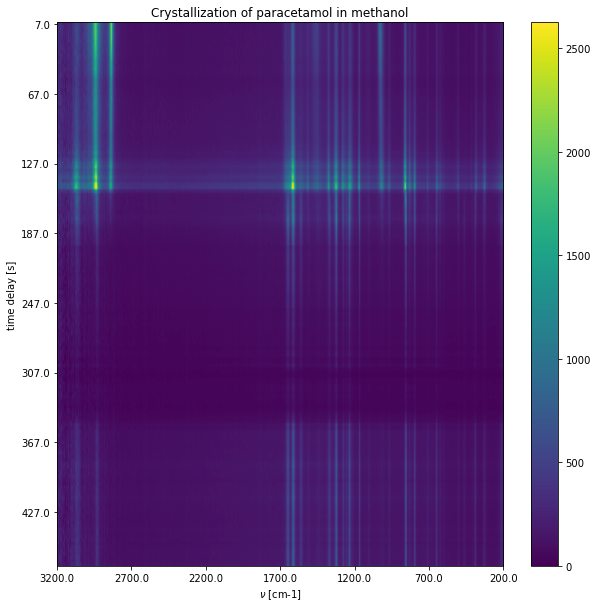

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(shifts.T, aspect="auto")
plt.yticks(np.arange(timer.shape[0], step=20), labels=timer[::20])
plt.xticks(np.arange(0,wn.shape[0], step=500), labels= wn[::500])
plt.colorbar()
plt.xlabel(r"$\nu$ [cm-1]")
plt.ylabel("time delay [s]")
plt.title("Crystallization of paracetamol in methanol")
plt.savefig("methanol_3_seconds_PCM.pdf")
plt.show()

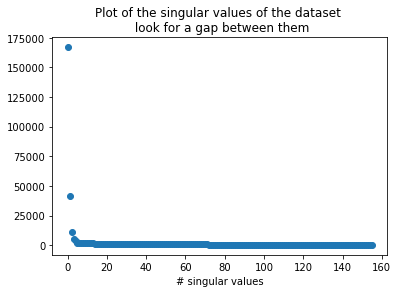

In [5]:
_, sv, _ = svd(shifts)
plt.scatter(np.arange(np.shape(sv) [0]), sv)
plt.xlabel("# singular values")
plt.title("Plot of the singular values of the dataset \n look for a gap between them")
plt.show()

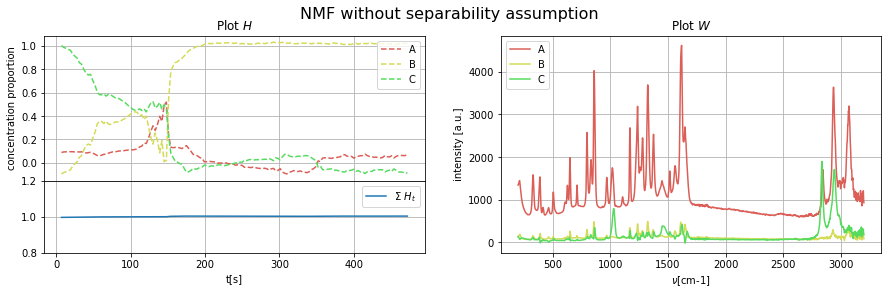

The minimal memory effect for 3 components is 0.106167.
Optimization terminated successfully.
         Current function value: 0.071805
         Iterations: 399
         Function evaluations: 590


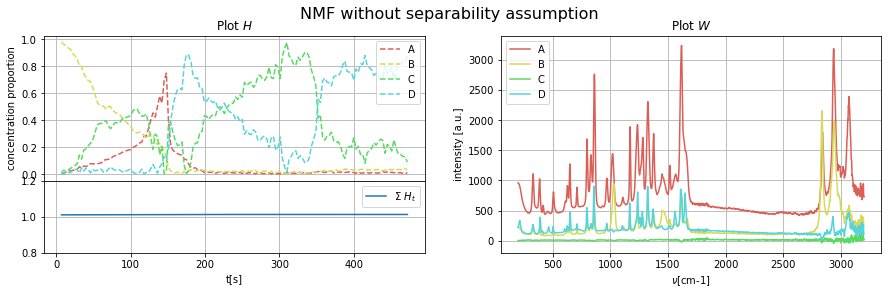

The minimal memory effect for 4 components is 0.030576.
Optimization terminated successfully.
         Current function value: 2.524946
         Iterations: 2441
         Function evaluations: 3194


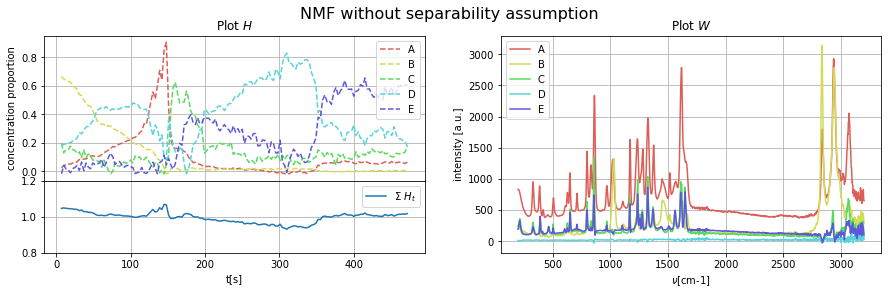

The minimal memory effect for 5 components is 0.001437.
The best result is  (3, 0.10616719)


In [6]:
example_list = [3,4,5]#[]
example_params = [-0.01, -50.,5., 0., 0.] # [1,1,1,1,1]
full_data_detS = mme_new(shifts, timer,wn, params=example_params,clus_list=example_list)

As the printing message at the bottom of the output says, the best results are obtained with a decomposition of 3,4,5 compounds. Given the list with the most successful decompositions, you can check the output graphic and consider also the kinetic-curves profiles  in $H$ and the spectral amplitudes in $W$. 
<br />
In this case, the decomposition with three species shows good kinetic profiles. The decompositions with 4 and 5 compounds show kinetic curves in which the concentration rises, decreases and rises again. This behaviour is not what we expect from the reaction compounds, so we pick the decomposition into three species.<br />  A more detailed explanation can be found in the paper [cite paper].

In [7]:
full_data_detS

array([(3, 0.10616719), (4, 0.03057614), (5, 0.00143666)],
      dtype=[('compounds', '<i4'), ('detS', '<f8')])

In [8]:
example_params = [-0.01, -50.,5., 0., 0.] # [1,1,1,1,1]
M_r, W_r, H_r, P_r, A_optimized, chi, Uitgm = nmf(shifts, r=3, params=example_params) #to finish

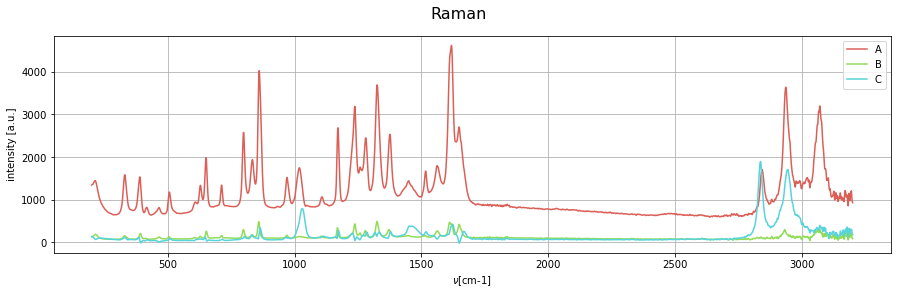

In [9]:

cmap = ListedColormap(sns.color_palette("hls", int(4)).as_hex())
plt.figure(figsize=(15,4))
plt.suptitle('Raman', fontsize=16)
labels= list(string.ascii_uppercase)

for i in range(3):
    plt.plot(wn,W_r.T[i], "-", color=cmap(i), label=labels[i])
    #    plt.xticks(np.arange(len(wn), step=300),labels=(np.round(wn[::300])))

    plt.legend()
    plt.grid()

    plt.xlabel(r"$\nu$[cm-1]")
    plt.ylabel("intensity [a.u.]")
       # plt.gca().invert_xaxis()


In [10]:
#peaks_paper = [651, 799, 861, 1170, 1280, 1327, 1375, 1609, 1624, 1642, 1651, 1649, 2935] no
peaks_crys = [861, 1170, 1280, 1327, 1375,1609, 1624, 1642, 1651,2935]#cm-1
peaks_map = [1236,1235, 1280, 1282, 1326, 1327, 1376, 1376, 1618,1619, 2841] #cm-1 metastable amorphous paracetamol 

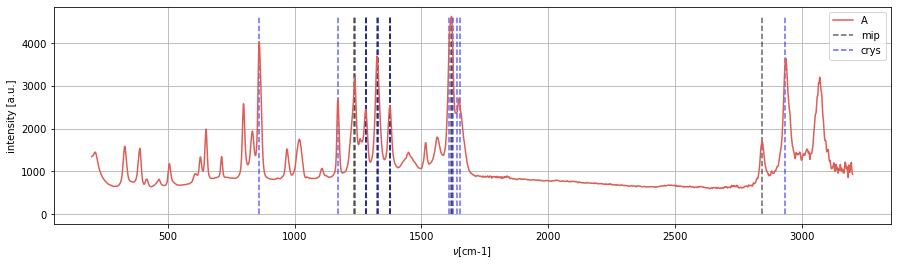

In [11]:
plt.figure(figsize=(15,4))
plt.plot(wn,W_r.T[0], "-", color=cmap(0), label=labels[0])
#    plt.xticks(np.arange(len(wn), step=300),labels=(np.round(wn[::300])))
plt.vlines(peaks_map, 0,np.amax(W_r.T[0]), color="black", ls="--",alpha=0.6, label="mip")
plt.vlines(peaks_crys, 0,np.amax(W_r.T[0]), color="b", ls="--",alpha=0.6, label="crys")
plt.legend()
plt.grid()

plt.xlabel(r"$\nu$[cm-1]")
plt.ylabel("intensity [a.u.]")
plt.savefig("raman-A.pdf")

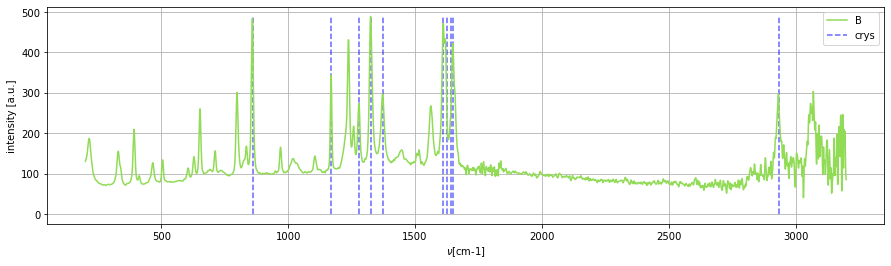

In [12]:
plt.figure(figsize=(15,4))
plt.plot(wn,W_r.T[1], "-", color=cmap(1), label=labels[1])
#    plt.xticks(np.arange(len(wn), step=300),labels=(np.round(wn[::300])))
#plt.vlines(peaks_map, 0,np.amax(W_r.T[1]), color="black", ls="--",alpha=0.6, label="map")
plt.vlines(peaks_crys, 0,np.amax(W_r.T[1]), color="b", ls="--",alpha=0.6, label="crys")
plt.legend()
plt.grid()

plt.xlabel(r"$\nu$[cm-1]")
plt.ylabel("intensity [a.u.]")
plt.savefig("raman-B.pdf")

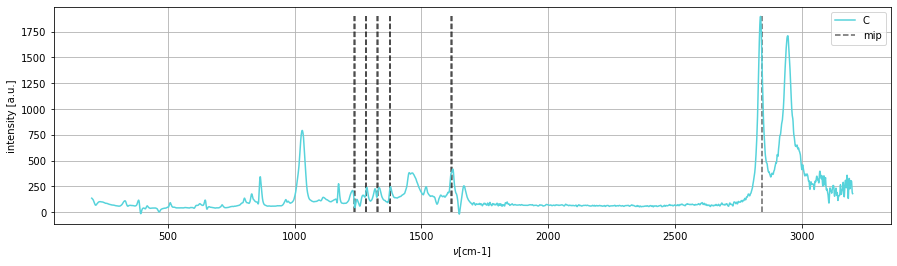

In [13]:
plt.figure(figsize=(15,4))
plt.plot(wn,W_r.T[2], "-", color=cmap(2), label=labels[2])
#    plt.xticks(np.arange(len(wn), step=300),labels=(np.round(wn[::300])))
plt.vlines(peaks_map, 0,np.amax(W_r.T[2]), color="black", ls="--", alpha=0.6, label="mip")
#plt.vlines(peaks_crys, 0,1400, color="b", ls="--", alpha=0.6,label="crys")
plt.legend()
plt.grid()

plt.xlabel(r"$\nu$[cm-1]")
plt.ylabel("intensity [a.u.]")
plt.savefig("raman-C.pdf")

In [14]:
np.round(P_r,2)


array([[ 0.94,  0.16, -0.1 ],
       [ 0.  ,  1.  ,  0.  ],
       [ 0.01, -0.  ,  0.99]])

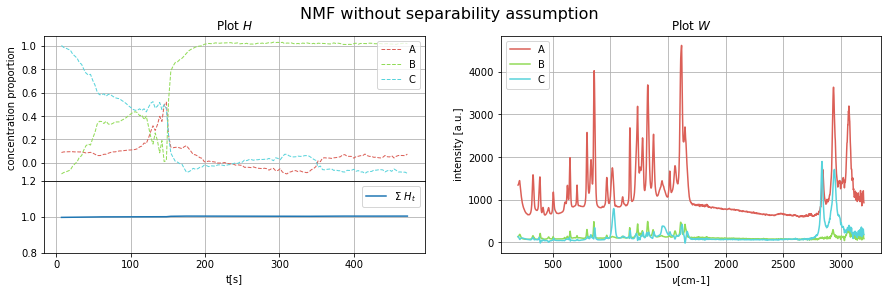

In [15]:
M_a, W_a, H_a, K_a, _,Chi_a, _ = nmf(shifts, r=3, params=example_params )

 #memory 
Sa, detSa = memory_nmf(H_a.T)
#list_memory.append((nclus, detSa))

#%% plot
fig = plt.figure(figsize=(15,4))
plt.suptitle('NMF without separability assumption', fontsize=16)
labels= list(string.ascii_uppercase)
cmap = ListedColormap(sns.color_palette("hls", int(3+1)).as_hex())#plt.get_cmap("tab20")

ax1 = fig.add_subplot(122)
ax1.set_title("Plot $W$")
for i in range(3):
    ax1.plot(wn,W_a.T[i], "-" ,color=cmap(i), label=labels[i])
#    plt.xticks(np.arange(len(wn), step=300),labels=(np.round(wn[::300])))

plt.legend()
plt.grid()

ax1.set_xlabel(r"$\nu$[cm-1]")
ax1.set_ylabel("intensity [a.u.]")
# other column
gs = fig.add_gridspec(3, 2, hspace=0)
ax2 = fig.add_subplot(gs[:2, 0])
ax2.set_title("Plot $H$")
for i in range(len(H_a)):
   # ax2.plot(timer,H_a[i]/abs(H_a).sum(axis=0), '--', color=cmap((i)),label=labels[i])
    ax2.plot(timer,H_a[i], '--', linewidth=1 ,color=cmap((i)),label=labels[i])

    #plt.xticks(np.arange(len(wl), step=120))#,labels=(np.round(wl[/1000)))
plt.grid()
plt.legend(loc=1)

ax2.set_ylabel("concentration proportion")
ax3 = fig.add_subplot(gs[2, 0])
ax3.plot(timer,H_a.sum(axis=0), label= "$\Sigma$ $H_t$")
ax3.set_ylim(0.8, 1.2)
plt.grid()
plt.legend()
ax3.set_xlabel("t[s]")#"$\lambda$/nm")
ax3.label_outer()
ax2.label_outer()

# plt.gca().invert_xaxis() 

#plt.savefig("methanol_new_3_cluster.pdf")
# if savefigs==True:

plt.show()